# ENFUSE - Passenger Data

## Authored by - Abhishek Gupte

### Tips - 
### 1. Use K Cross Validation
### 2. Use mean or median as a central measure

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
# %matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns\

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score,TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
import numpy as np

In [9]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
data = pd.read_csv('../datasets/pedestrian-counts-1-jan-2-april-2023.csv')

# Convert the 'Time' to pandas datetime format
data['Time'] = pd.to_datetime(data['Time'], dayfirst=True)
# Separating the date and the hours
data["Date"] = data["Time"].dt.date
data["Time"] = data["Time"].dt.time

# Setting the 'Date' as the index
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)
# Resampling the dataset to show only days and not hours
data = data.resample("D").sum()

print(data)

            Aston Quay/Fitzgeralds  Aston Quay/Fitzgeralds IN  \
Date                                                            
2023-01-01                 63870.0                    33667.0   
2023-01-02                 61874.0                    33611.0   
2023-01-03                 66584.0                    33261.0   
2023-01-04                 64187.0                    31236.0   
2023-01-05                 68108.0                    34143.0   
...                            ...                        ...   
2023-03-29                 73596.0                    35358.0   
2023-03-30                 79761.0                    38716.0   
2023-03-31                 88332.0                    43993.0   
2023-04-01                 88105.0                    44634.0   
2023-04-02                 76113.0                    38526.0   

            Aston Quay/Fitzgeralds OUT  Bachelors walk/Bachelors way  \
Date                                                                   
2023-01-01

In [12]:
len(data)

92

In [13]:
data.head()

Aston Quay/Fitzgeralds  Aston Quay/Fitzgeralds IN  \
Date                                                            
2023-01-01                 63870.0                    33667.0   
2023-01-02                 61874.0                    33611.0   
2023-01-03                 66584.0                    33261.0   
2023-01-04                 64187.0                    31236.0   
2023-01-05                 68108.0                    34143.0   

            Aston Quay/Fitzgeralds OUT  Bachelors walk/Bachelors way  \
Date                                                                   
2023-01-01                     30203.0                           0.0   
2023-01-02                     28263.0                           0.0   
2023-01-03                     33323.0                           0.0   
2023-01-04                     32951.0                           0.0   
2023-01-05                     33965.0                           0.0   

            Bachelors walk/Bachelors way IN  Bachelors walk/Bachelors way OUT  \
Date                                                                            
2023-01-01                              0.0                               0.0   
2023-01-02                              0.0                               0.0   
2023-01-03                              0.0                               0.0   
2023-01-04                              0.0                               0.0   
2023-01-05                              0.0                               0.0   

            Baggot st lower/Wilton tce inbound  \
Date                                             
2023-01-01                              2064.0   
2023-01-02                              1715.0   
2023-01-03                              3810.0   
2023-01-04                              7045.0   
2023-01-05                              4965.0   

            Baggot st lower/Wilton tce inbound Pedestrians IN  \
Date                                                            
2023-01-01                                             1545.0   
2023-01-02                                             1320.0   
2023-01-03                                             2911.0   
2023-01-04                                             5960.0   
2023-01-05                                             3843.0   

            Baggot st lower/Wilton tce inbound Pedestrians OUT  \
Date                                                             
2023-01-01                                              519.0    
2023-01-02                                              395.0    
2023-01-03                                              899.0    
2023-01-04                                             1085.0    
2023-01-05                                             1122.0    

            Baggot st upper/Mespil rd/Bank  ...  Talbot st/Guineys OUT  \
Date                                        ...                          
2023-01-01                        100665.0  ...                24427.0   
2023-01-02                         84059.0  ...                24164.0   
2023-01-03                        135259.0  ...                21373.0   
2023-01-04                        129620.0  ...                21458.0   
2023-01-05                        136491.0  ...                23107.0   

            Talbot st/Murrays Pharmacy  Talbot st/Murrays Pharmacy IN  \
Date                                                                    
2023-01-01                     49827.0                        43711.0   
2023-01-02                     50622.0                        43445.0   
2023-01-03                     37951.0                        30737.0   
2023-01-04                     35921.0                        28811.0   
2023-01-05                     42018.0                        34307.0   

            Talbot st/Murrays Pharmacy OUT  \
Date                                         
2023-01-01                          6116.0   
2023-01-02                          7177.0  

In [14]:
data_columns = data.columns[1:]

In [15]:
data_ped_zeroes = [
    data.loc[
        (data[column] == 0.0) | (data[column].isnull()), 
        column
    ].size
    for column in data_columns
]

In [16]:
data_ped_combined = dict(zip(data_columns,data_ped_zeroes))
df_zeroes_count = pd.Series(data_ped_combined)

In [17]:
data_ped_combined

{'Aston Quay/Fitzgeralds IN': 0,
 'Aston Quay/Fitzgeralds OUT': 0,
 'Bachelors walk/Bachelors way': 74,
 'Bachelors walk/Bachelors way IN': 74,
 'Bachelors walk/Bachelors way OUT': 84,
 'Baggot st lower/Wilton tce inbound': 0,
 'Baggot st lower/Wilton tce inbound Pedestrians IN': 0,
 'Baggot st lower/Wilton tce inbound Pedestrians OUT': 0,
 'Baggot st upper/Mespil rd/Bank': 0,
 'Baggot st upper/Mespil rd/Bank Pedestrians IN': 0,
 'Baggot st upper/Mespil rd/Bank Pedestrians OUT': 0,
 'Capel st/Mary street': 0,
 'Capel st/Mary street Pedestrian IN': 0,
 'Capel st/Mary street Pedestrian OUT': 0,
 'College Green/Bank Of Ireland': 1,
 'College Green/Bank Of Ireland IN': 1,
 'College Green/Bank Of Ireland OUT': 1,
 'College Green/Church Lane': 65,
 'College Green/Church Lane IN': 65,
 'College Green/Church Lane OUT': 65,
 'College st/Westmoreland st': 0,
 'College st/Westmoreland st IN': 0,
 'College st/Westmoreland st OUT': 0,
 "D'olier st/Burgh Quay": 1,
 "D'olier st/Burgh Quay IN": 1,
 "D

In [18]:
df_zeroes_count

Aston Quay/Fitzgeralds IN                     0
Aston Quay/Fitzgeralds OUT                    0
Bachelors walk/Bachelors way                 74
Bachelors walk/Bachelors way IN              74
Bachelors walk/Bachelors way OUT             84
                                             ..
Westmoreland Street East/Fleet street IN      0
Westmoreland Street East/Fleet street OUT     0
Westmoreland Street West/Carrolls            39
Westmoreland Street West/Carrolls IN         39
Westmoreland Street West/Carrolls OUT        39
Length: 101, dtype: int64

In [19]:
df_our_columns_list = list(df_zeroes_count[ df_zeroes_count < 42 ].index)
# Dropped columns where count of 0's was greater than 100
df_our_columns_list

['Aston Quay/Fitzgeralds IN',
 'Aston Quay/Fitzgeralds OUT',
 'Baggot st lower/Wilton tce inbound',
 'Baggot st lower/Wilton tce inbound Pedestrians IN',
 'Baggot st lower/Wilton tce inbound Pedestrians OUT',
 'Baggot st upper/Mespil rd/Bank',
 'Baggot st upper/Mespil rd/Bank Pedestrians IN',
 'Baggot st upper/Mespil rd/Bank Pedestrians OUT',
 'Capel st/Mary street',
 'Capel st/Mary street Pedestrian IN',
 'Capel st/Mary street Pedestrian OUT',
 'College Green/Bank Of Ireland',
 'College Green/Bank Of Ireland IN',
 'College Green/Bank Of Ireland OUT',
 'College st/Westmoreland st',
 'College st/Westmoreland st IN',
 'College st/Westmoreland st OUT',
 "D'olier st/Burgh Quay",
 "D'olier st/Burgh Quay IN",
 "D'olier st/Burgh Quay OUT",
 'Dame Street/Londis',
 'Dame Street/Londis Pedestrian IN',
 'Dame Street/Londis Pedestrian OUT',
 'Grafton Street / Nassau Street / Suffolk Street',
 'Grafton Street / Nassau Street / Suffolk Street IN',
 'Grafton Street / Nassau Street / Suffolk Street OU

In [20]:
df_our_data = data.loc[:,df_our_columns_list]

In [21]:
len(df_our_data)

92

In [22]:
df_our_data

Aston Quay/Fitzgeralds IN  Aston Quay/Fitzgeralds OUT  \
Date                                                                
2023-01-01                    33667.0                     30203.0   
2023-01-02                    33611.0                     28263.0   
2023-01-03                    33261.0                     33323.0   
2023-01-04                    31236.0                     32951.0   
2023-01-05                    34143.0                     33965.0   
...                               ...                         ...   
2023-03-29                    35358.0                     38238.0   
2023-03-30                    38716.0                     41045.0   
2023-03-31                    43993.0                     44339.0   
2023-04-01                    44634.0                     43471.0   
2023-04-02                    38526.0                     37587.0   

            Baggot st lower/Wilton tce inbound  \
Date                                             
2023-01-01                              2064.0   
2023-01-02                              1715.0   
2023-01-03                              3810.0   
2023-01-04                              7045.0   
2023-01-05                              4965.0   
...                                        ...   
2023-03-29                              4703.0   
2023-03-30                              4647.0   
2023-03-31                              3085.0   
2023-04-01                              2694.0   
2023-04-02                              2015.0   

            Baggot st lower/Wilton tce inbound Pedestrians IN  \
Date                                                            
2023-01-01                                             1545.0   
2023-01-02                                             1320.0   
2023-01-03                                             2911.0   
2023-01-04                                             5960.0   
2023-01-05                                             3843.0   
...                                                       ...   
2023-03-29                                             2743.0   
2023-03-30                                             2810.0   
2023-03-31                                             1801.0   
2023-04-01                                             1766.0   
2023-04-02                                             1346.0   

            Baggot st lower/Wilton tce inbound Pedestrians OUT  \
Date                                                             
2023-01-01                                              519.0    
2023-01-02                                              395.0    
2023-01-03                                              899.0    
2023-01-04                                             1085.0    
2023-01-05                                             1122.0    
...                                                       ...    
2023-03-29                                             1960.0    
2023-03-30                                             1837.0    
2023-03-31                                             1284.0    
2023-04-01                                              928.0    
2023-04-02                                              669.0    

            Baggot st upper/Mespil rd/Bank  \
Date                                         
2023-01-01                        100665.0   
2023-01-02                         84059.0   
2023-01-03                        135259.0   
2023-01-04                        129620.0   
2023-01-05                        136491.0   
...                                    ...   
2023-03-29                        150904.0   
2023-03-30                        144601.0   
2023-03-31                        152987.0   
2023-04-01                        136122.0   
2023-04-02                        116674.0   

            Baggot st upper/Mespil rd/Bank Pedestrians IN  \
Date                                                        
2023-01-01                           

In [23]:
df_our_data.columns

Index(['Aston Quay/Fitzgeralds IN', 'Aston Quay/Fitzgeralds OUT',
       'Baggot st lower/Wilton tce inbound',
       'Baggot st lower/Wilton tce inbound Pedestrians IN',
       'Baggot st lower/Wilton tce inbound Pedestrians OUT',
       'Baggot st upper/Mespil rd/Bank',
       'Baggot st upper/Mespil rd/Bank Pedestrians IN',
       'Baggot st upper/Mespil rd/Bank Pedestrians OUT',
       'Capel st/Mary street', 'Capel st/Mary street Pedestrian IN',
       'Capel st/Mary street Pedestrian OUT', 'College Green/Bank Of Ireland',
       'College Green/Bank Of Ireland IN', 'College Green/Bank Of Ireland OUT',
       'College st/Westmoreland st', 'College st/Westmoreland st IN',
       'College st/Westmoreland st OUT', 'D'olier st/Burgh Quay',
       'D'olier st/Burgh Quay IN', 'D'olier st/Burgh Quay OUT',
       'Dame Street/Londis', 'Dame Street/Londis Pedestrian IN',
       'Dame Street/Londis Pedestrian OUT',
       'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Str

In [24]:
df_our_data[-1:]

Aston Quay/Fitzgeralds IN  Aston Quay/Fitzgeralds OUT  \
Date                                                                
2023-04-02                    38526.0                     37587.0   

            Baggot st lower/Wilton tce inbound  \
Date                                             
2023-04-02                              2015.0   

            Baggot st lower/Wilton tce inbound Pedestrians IN  \
Date                                                            
2023-04-02                                             1346.0   

            Baggot st lower/Wilton tce inbound Pedestrians OUT  \
Date                                                             
2023-04-02                                              669.0    

            Baggot st upper/Mespil rd/Bank  \
Date                                         
2023-04-02                        116674.0   

            Baggot st upper/Mespil rd/Bank Pedestrians IN  \
Date                                                        
2023-04-02                                        72570.0   

            Baggot st upper/Mespil rd/Bank Pedestrians OUT  \
Date                                                         
2023-04-02                                         44104.0   

            Capel st/Mary street  Capel st/Mary street Pedestrian IN  ...  \
Date                                                                  ...   
2023-04-02               38087.0                             27293.0  ...   

            Richmond st south/Portabello Harbour outbound Pedestrians OUT  \
Date                                                                        
2023-04-02                                             3292.0               

            Talbot st/Guineys  Talbot st/Guineys IN  Talbot st/Guineys OUT  \
Date                                                                         
2023-04-02            75642.0               30315.0                45327.0   

            Westmoreland Street East/Fleet street  \
Date                                                
2023-04-02                                29008.0   

            Westmoreland Street East/Fleet street IN  \
Date                                                   
2023-04-02                                   24781.0   

            Westmoreland Street East/Fleet street OUT  \
Date                                                    
2023-04-02                                     4227.0   

            Westmoreland Street West/Carrolls  \
Date                                            
2023-04-02                                0.0   

            Westmoreland Street West/Carrolls IN  \
Date                                               
2023-04-02                                   0.0   

            Westmoreland Street West/Carrolls OUT  
Date                                               
2023-04-02                                    0.0  

[1 rows x 74 columns]

In [25]:
df_our_data.index.astype

<bound method Index.astype of DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '202

In [26]:
df_spread_descending = list(df_our_data.describe().loc['std',:].sort_values(ascending = True).index)

In [27]:
df_spread_descending

['Phibsborough Rd/Enniskerry Road Pedestrians OUT',
 'Phibsborough Rd/Enniskerry Road Pedestrians IN',
 'Phibsborough Rd/Enniskerry Road',
 'Grand Canal st upp/Clanwilliam place/Google Pedestrians OUT',
 'Richmond st south/Portabello Harbour outbound Pedestrians IN',
 'Grand Canal st upp/Clanwilliam place/Google Pedestrians IN',
 'Richmond st south/Portabello Harbour outbound Pedestrians OUT',
 'Baggot st lower/Wilton tce inbound Pedestrians OUT',
 'Richmond st south/Portabello Harbour inbound Pedestrians OUT',
 "O'Connell St/Parnell St/AIB IN",
 'Grand Canal st upp/Clanwilliam place Pedestrians IN',
 'Grand Canal st upp/Clanwilliam place/Google',
 "O'Connell St/Parnell St/AIB OUT",
 'Mary st/Jervis st OUT',
 'Grafton Street / Nassau Street / Suffolk Street OUT',
 'Grafton Street / Nassau Street / Suffolk Street IN',
 'Richmond st south/Portabello Harbour outbound',
 'Grand Canal st upp/Clanwilliam place Pedestrians OUT',
 'Westmoreland Street East/Fleet street OUT',
 'Mary st/Jervis s

In [28]:
df_our_data = df_our_data[df_spread_descending]

In [29]:
df_our_data

Phibsborough Rd/Enniskerry Road Pedestrians OUT  \
Date                                                          
2023-01-01                                            703.0   
2023-01-02                                            798.0   
2023-01-03                                            871.0   
2023-01-04                                            926.0   
2023-01-05                                            914.0   
...                                                     ...   
2023-03-29                                           1086.0   
2023-03-30                                           1138.0   
2023-03-31                                           1025.0   
2023-04-01                                            978.0   
2023-04-02                                           1495.0   

            Phibsborough Rd/Enniskerry Road Pedestrians IN  \
Date                                                         
2023-01-01                                           748.0   
2023-01-02                                           853.0   
2023-01-03                                           975.0   
2023-01-04                                           997.0   
2023-01-05                                          1051.0   
...                                                    ...   
2023-03-29                                          1212.0   
2023-03-30                                          1291.0   
2023-03-31                                          1176.0   
2023-04-01                                          1119.0   
2023-04-02                                          1475.0   

            Phibsborough Rd/Enniskerry Road  \
Date                                          
2023-01-01                           1451.0   
2023-01-02                           1651.0   
2023-01-03                           1846.0   
2023-01-04                           1923.0   
2023-01-05                           1965.0   
...                                     ...   
2023-03-29                           2298.0   
2023-03-30                           2429.0   
2023-03-31                           2201.0   
2023-04-01                           2097.0   
2023-04-02                           2970.0   

            Grand Canal st upp/Clanwilliam place/Google Pedestrians OUT  \
Date                                                                      
2023-01-01                                              514.0             
2023-01-02                                              476.0             
2023-01-03                                              613.0             
2023-01-04                                              651.0             
2023-01-05                                              700.0             
...                                                       ...             
2023-03-29                                             1083.0             
2023-03-30                                             1164.0             
2023-03-31                                              817.0             
2023-04-01                                             1188.0             
2023-04-02                                              697.0             

            Richmond st south/Portabello Harbour outbound Pedestrians IN  \
Date                                                                       
2023-01-01                                             1909.0              
2023-01-02                                             1907.0              
2023-01-03                                             1941.0              
2023-01-04                                             1973.0              
2023-01-05                                             2143.0              
...                                                       ...              
2023-03-29                                             3072.0              
2023-03-30                                             3276.0              
2023-03-31                           

In [30]:
df_our_data_set1 = df_our_data.iloc[:,1:37]
df_our_data_set2 = df_our_data.iloc[:,37:]

In [31]:
df_our_data_set1.columns

Index(['Phibsborough Rd/Enniskerry Road Pedestrians IN',
       'Phibsborough Rd/Enniskerry Road',
       'Grand Canal st upp/Clanwilliam place/Google Pedestrians OUT',
       'Richmond st south/Portabello Harbour outbound Pedestrians IN',
       'Grand Canal st upp/Clanwilliam place/Google Pedestrians IN',
       'Richmond st south/Portabello Harbour outbound Pedestrians OUT',
       'Baggot st lower/Wilton tce inbound Pedestrians OUT',
       'Richmond st south/Portabello Harbour inbound Pedestrians OUT',
       'O'Connell St/Parnell St/AIB IN',
       'Grand Canal st upp/Clanwilliam place Pedestrians IN',
       'Grand Canal st upp/Clanwilliam place/Google',
       'O'Connell St/Parnell St/AIB OUT', 'Mary st/Jervis st OUT',
       'Grafton Street / Nassau Street / Suffolk Street OUT',
       'Grafton Street / Nassau Street / Suffolk Street IN',
       'Richmond st south/Portabello Harbour outbound',
       'Grand Canal st upp/Clanwilliam place Pedestrians OUT',
       'Westmoreland 

In [32]:
df_our_data_set1.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

In [33]:
def scale_values(df:pd.DataFrame,scale):
    if scale is True:
        df.loc[:,:] = scaler.fit_transform(df)        
    return df

In [34]:
steps = 18
scaler = MinMaxScaler()
df_our_data_set1 = scale_values(df_our_data_set1, False)
data_test_set1 = df_our_data_set1[:-steps]
data_train_set1 = df_our_data_set1[steps:]
# prepare data for standardization
# values = values.reshape((len(values), 1))
# train the standardization
# scaled_trained_set1 = scaler.fit_transform(data_train_set1)
# scaled_test_set1 = scaler.fit_transform(data_test_set1)
def automate_graphs(name,data_train_set1,data_test_set1,data_predict_set1):
#     global data_train_set1
#     global data_test_set2
#     global data_train_set1
#     global data_test_set1
    fig, ax = plt.subplots(figsize=(7, 3))
    data_train_set1[name].plot(ax=ax, label='Test')
    data_test_set1[name].plot(ax=ax, label='Train')
    if data_predict_set1:
        data_predict_set1.plot(ax=ax, label = 'Predict')
#     predictions_charleville.plot(ax=ax, label='predictions')
    ax.legend();
    ax.set_title(name);
# scaled_trained_set1.size

In [35]:
df_our_data_set1

Phibsborough Rd/Enniskerry Road Pedestrians IN  \
Date                                                         
2023-01-01                                           748.0   
2023-01-02                                           853.0   
2023-01-03                                           975.0   
2023-01-04                                           997.0   
2023-01-05                                          1051.0   
...                                                    ...   
2023-03-29                                          1212.0   
2023-03-30                                          1291.0   
2023-03-31                                          1176.0   
2023-04-01                                          1119.0   
2023-04-02                                          1475.0   

            Phibsborough Rd/Enniskerry Road  \
Date                                          
2023-01-01                           1451.0   
2023-01-02                           1651.0   
2023-01-03                           1846.0   
2023-01-04                           1923.0   
2023-01-05                           1965.0   
...                                     ...   
2023-03-29                           2298.0   
2023-03-30                           2429.0   
2023-03-31                           2201.0   
2023-04-01                           2097.0   
2023-04-02                           2970.0   

            Grand Canal st upp/Clanwilliam place/Google Pedestrians OUT  \
Date                                                                      
2023-01-01                                              514.0             
2023-01-02                                              476.0             
2023-01-03                                              613.0             
2023-01-04                                              651.0             
2023-01-05                                              700.0             
...                                                       ...             
2023-03-29                                             1083.0             
2023-03-30                                             1164.0             
2023-03-31                                              817.0             
2023-04-01                                             1188.0             
2023-04-02                                              697.0             

            Richmond st south/Portabello Harbour outbound Pedestrians IN  \
Date                                                                       
2023-01-01                                             1909.0              
2023-01-02                                             1907.0              
2023-01-03                                             1941.0              
2023-01-04                                             1973.0              
2023-01-05                                             2143.0              
...                                                       ...              
2023-03-29                                             3072.0              
2023-03-30                                             3276.0              
2023-03-31                                             2449.0              
2023-04-01                                             2440.0              
2023-04-02                                             2926.0              

            Grand Canal st upp/Clanwilliam place/Google Pedestrians IN  \
Date                                                                     
2023-01-01                                              420.0            
2023-01-02                                              459.0            
2023-01-03                                              805.0            
2023-01-04                                              854.0            
2023-01-05                                              912.0            
...                                                       ...            
2023-03-29                          

In [36]:
def automate_graphs_pred(column,data_train_set1,data_test_set1,data_predict_set1):
#     global data_train_set1
#     global data_test_set2
#     global data_train_set1
#     global data_test_set1
    fig, ax = plt.subplots(figsize=(7, 3))
    data_train_set1.plot(ax=ax, label='Test')
    data_test_set1.plot(ax=ax, label='Train')
    data_predict_set1.plot(ax=ax, label = 'Predict')
#     predictions_charleville.plot(ax=ax, label='predictions')
    ax.legend();
    ax.set_title(column);

/var/folders/vb/xmbxf6v15d56yl6wpxdqgwpm0000gn/T/ipykernel_5922/4081193331.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7, 3))


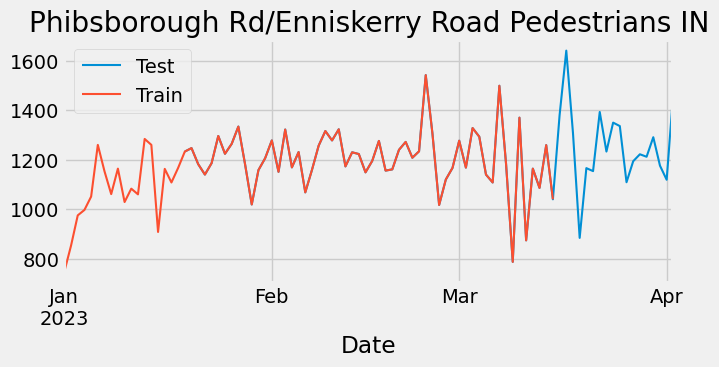

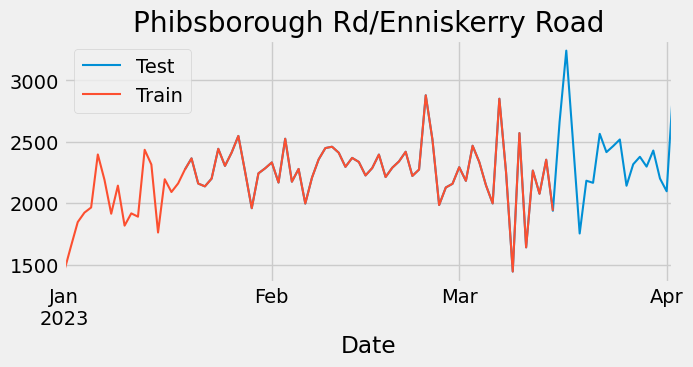

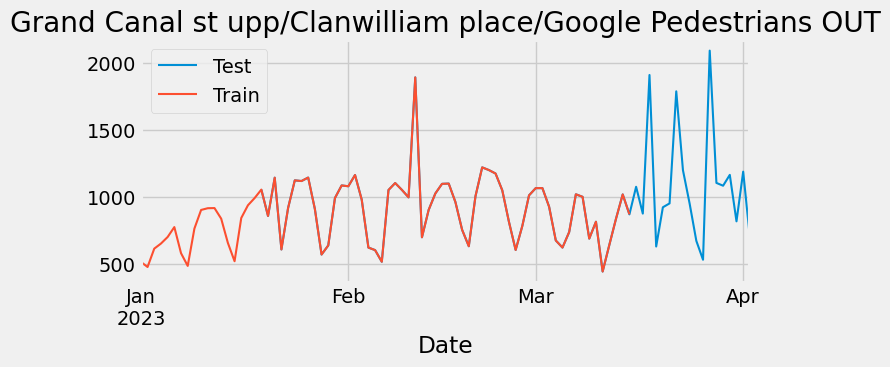

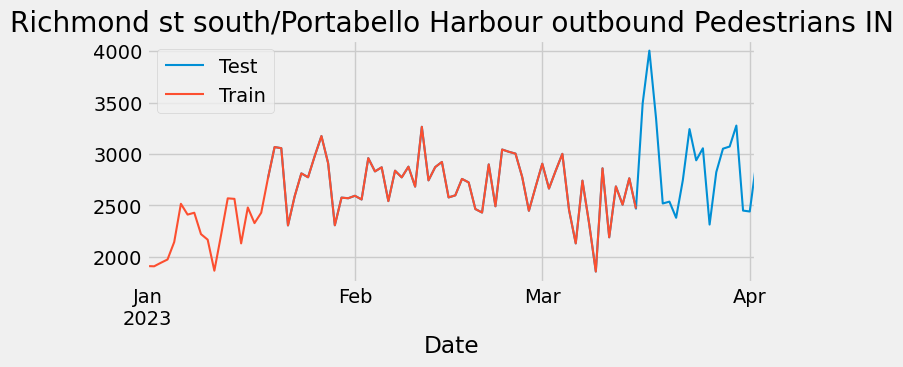

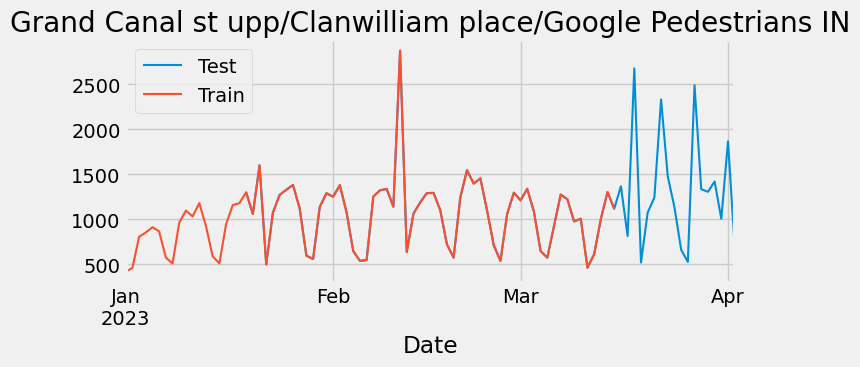

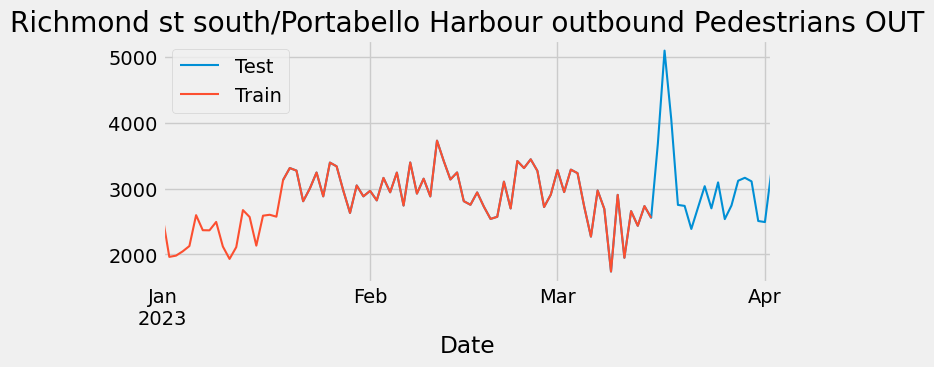

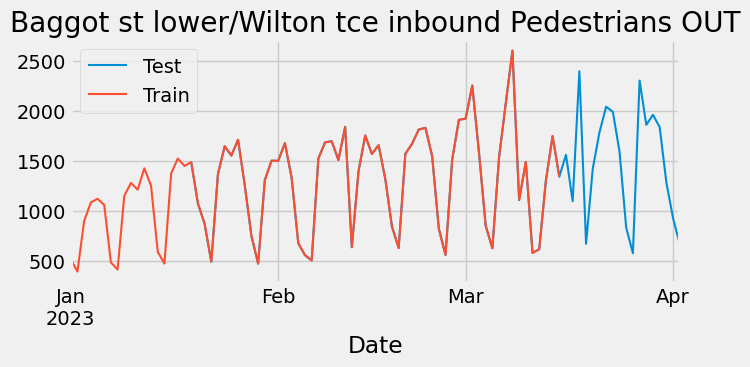

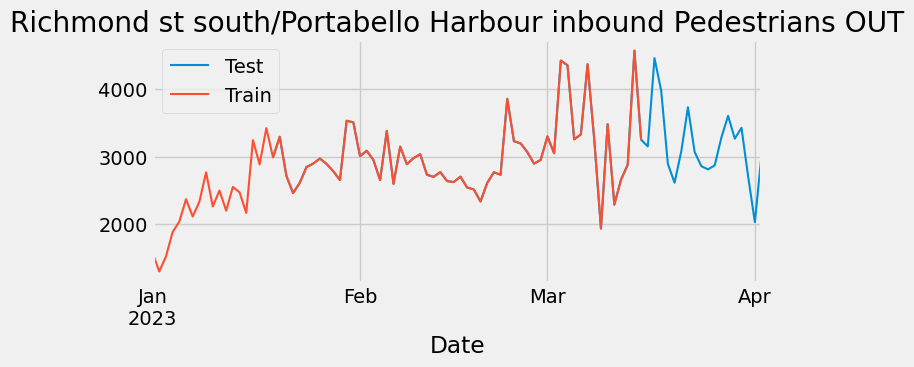

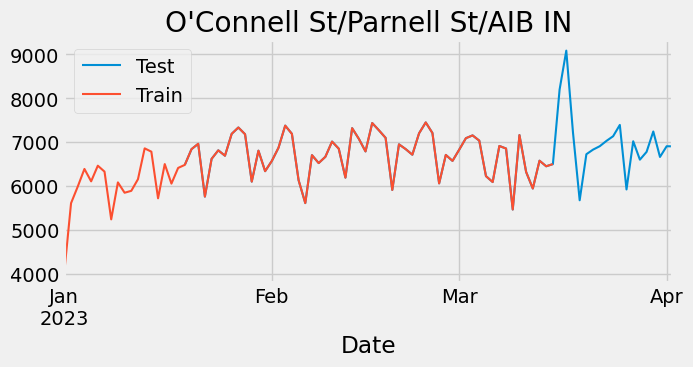

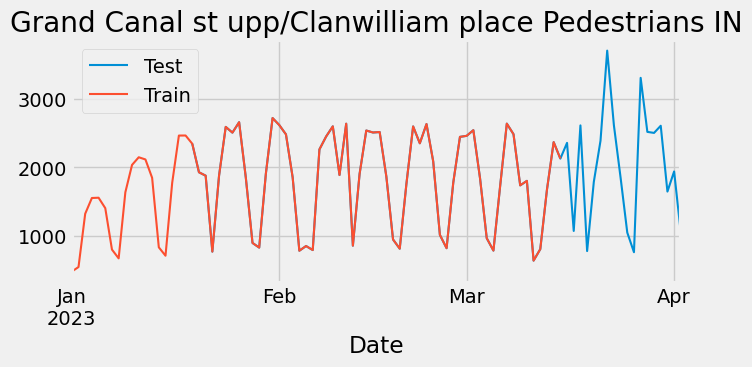

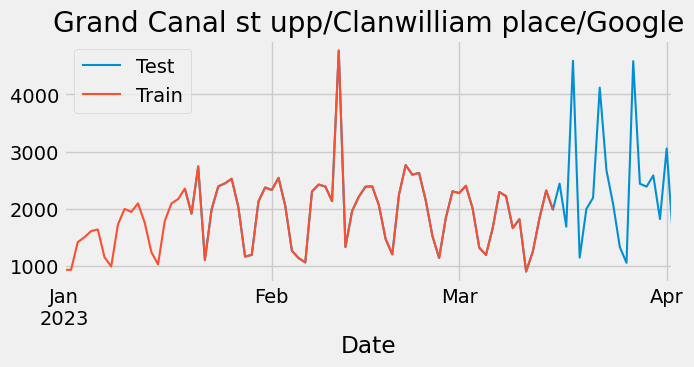

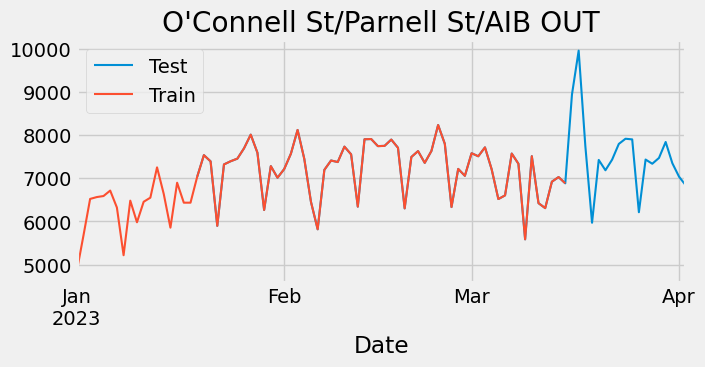

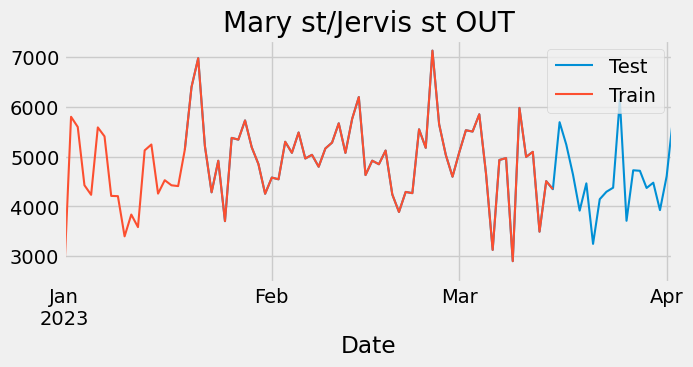

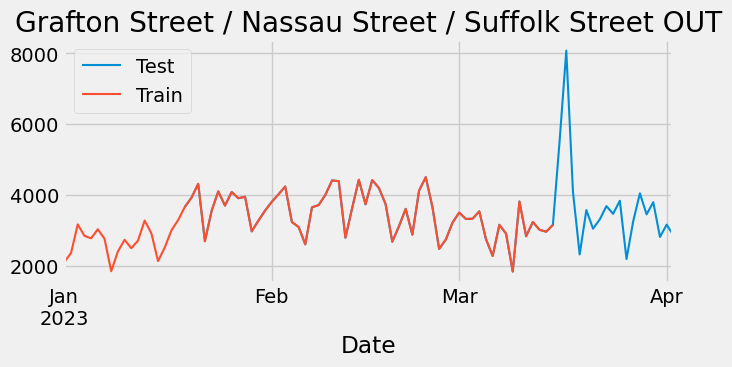

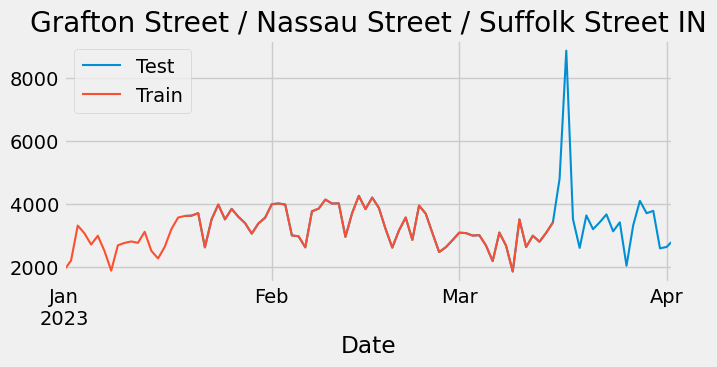

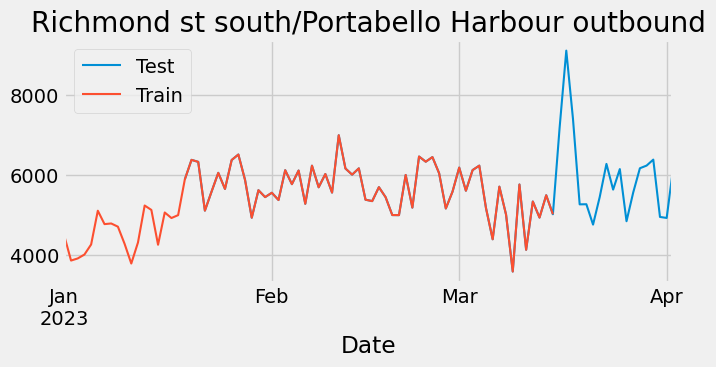

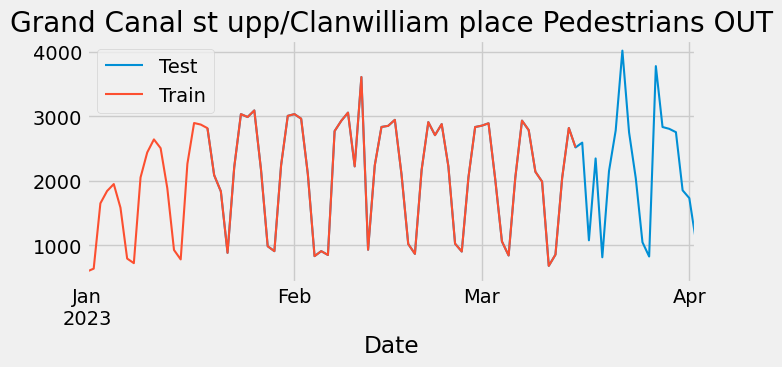

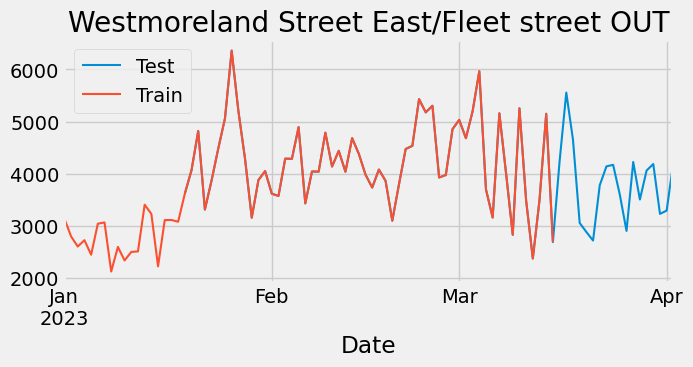

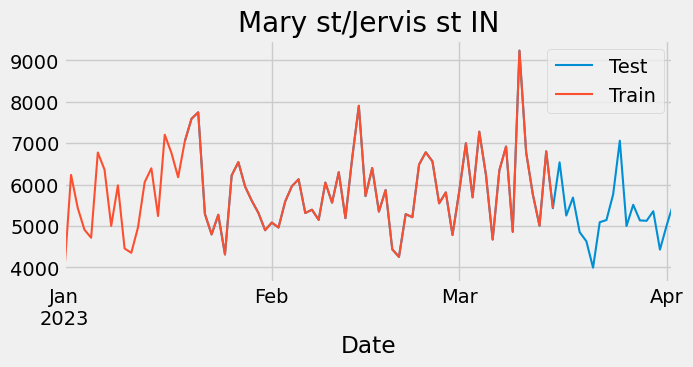

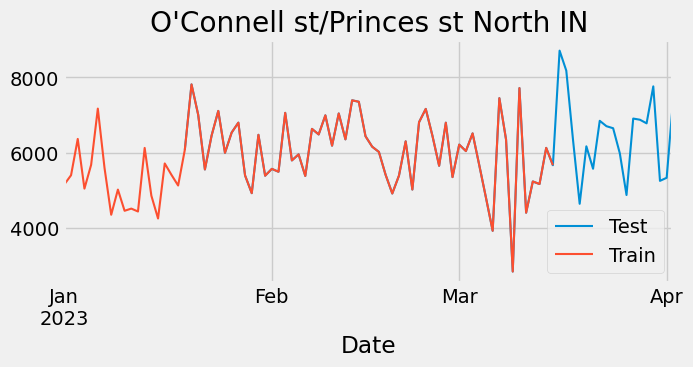

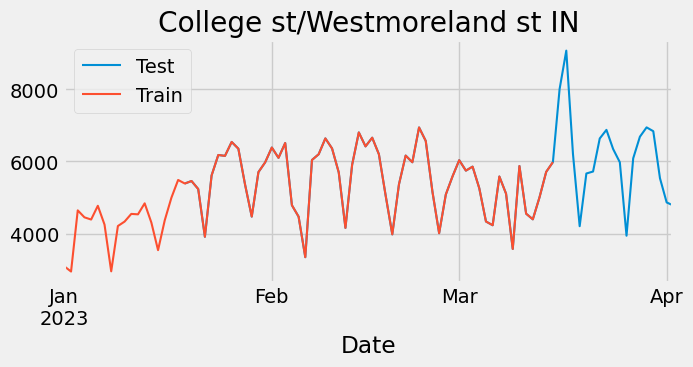

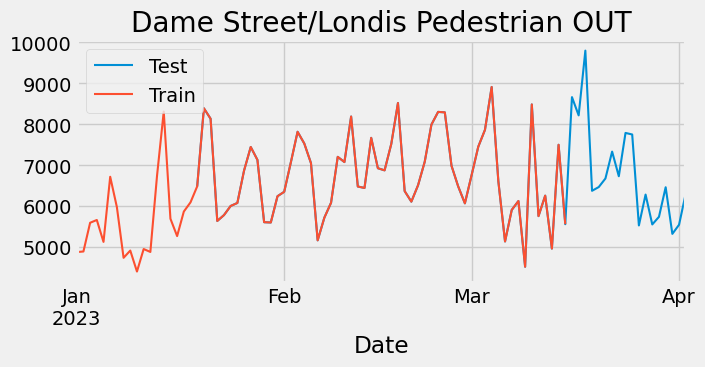

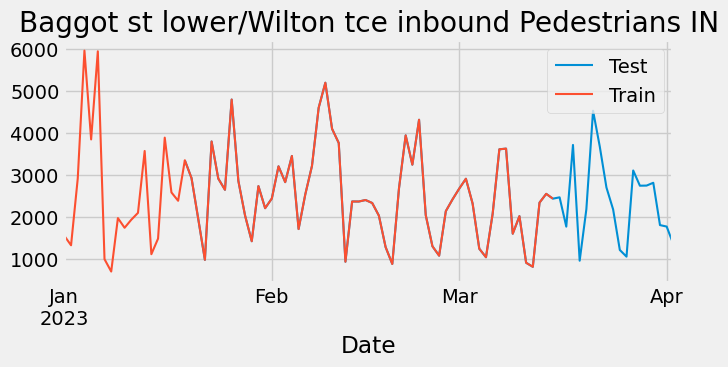

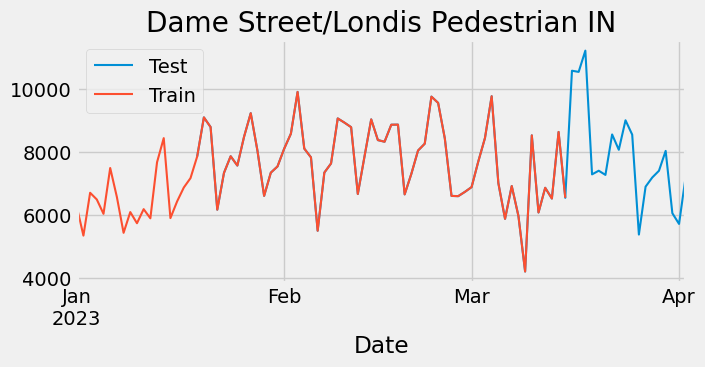

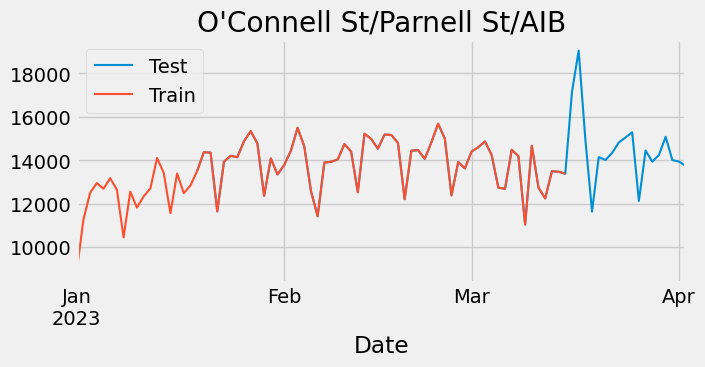

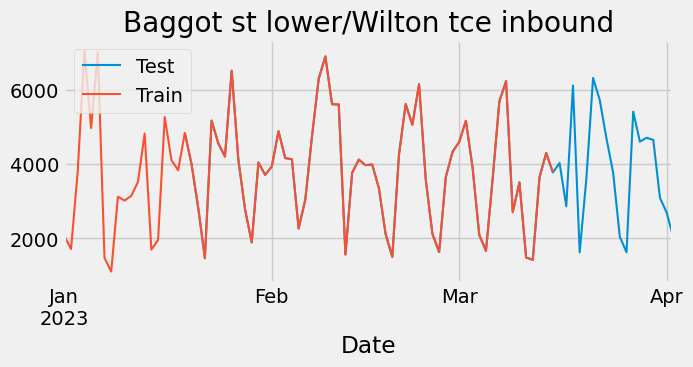

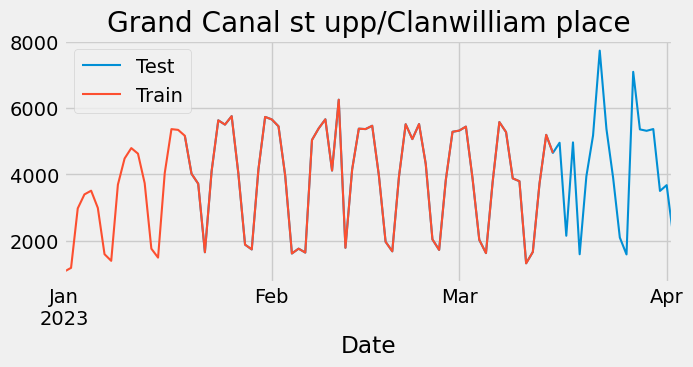

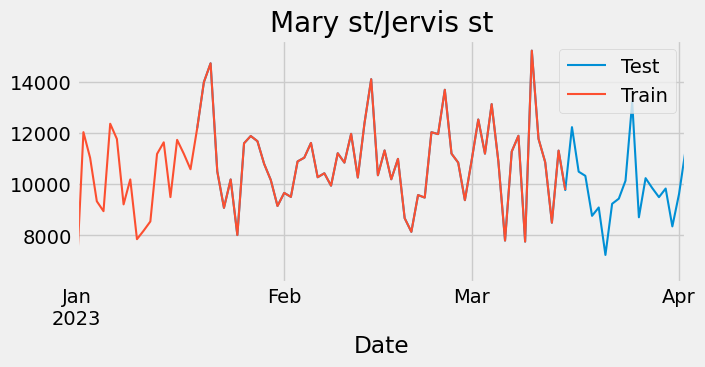

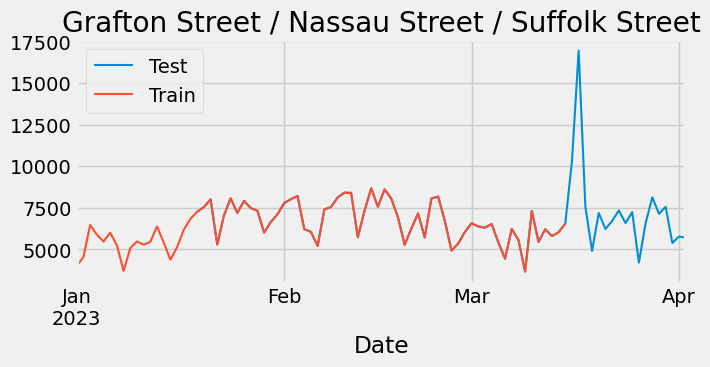

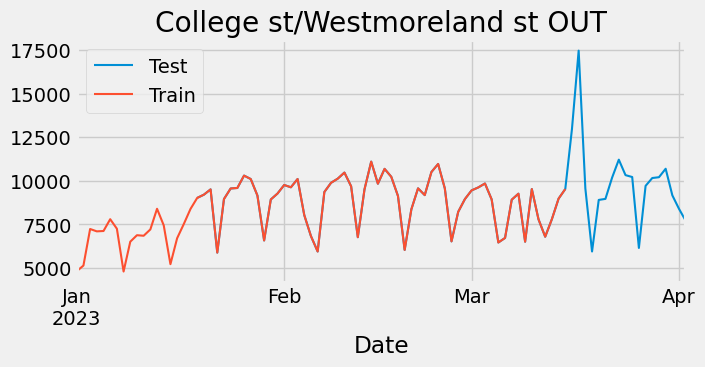

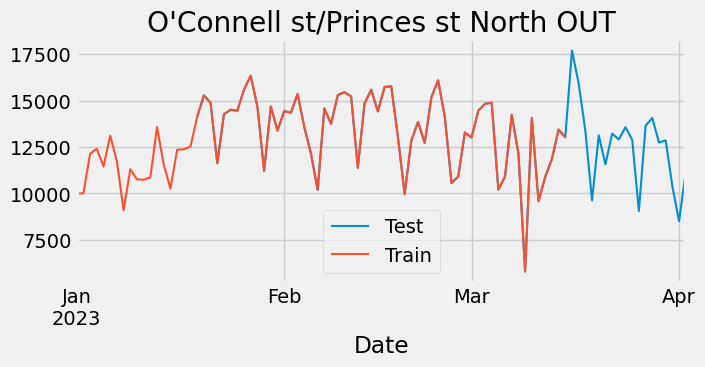

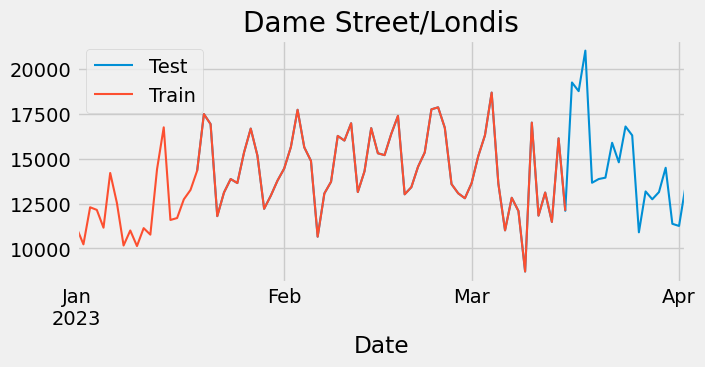

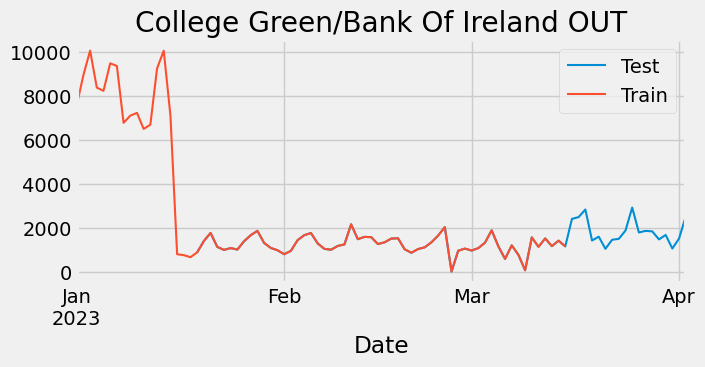

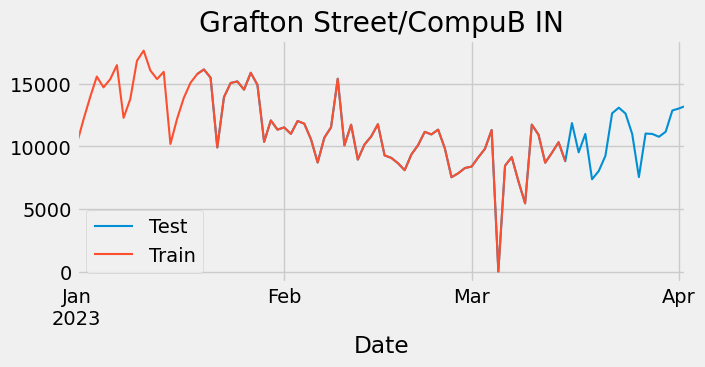

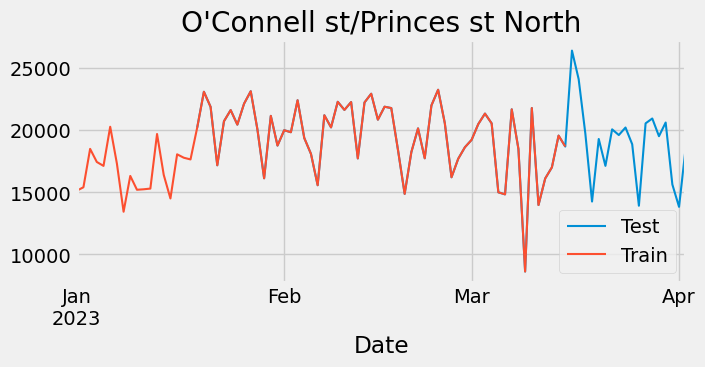

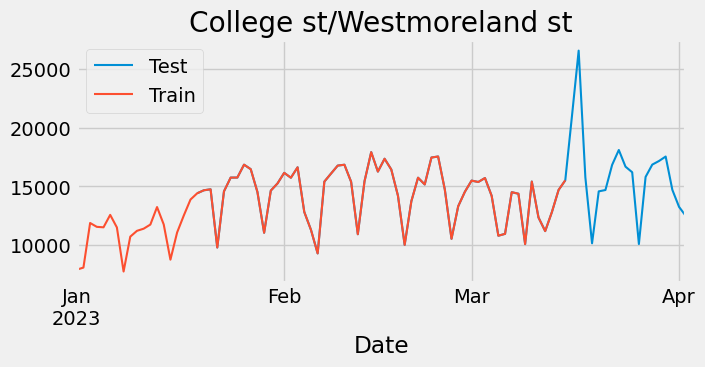

In [37]:
for column in data_train_set1.columns:
    automate_graphs(column,data_train_set1,data_test_set1,None)


In [38]:
def automate_kde_graphs(name,df_our_data_set_1)->None:
#     global data_train_set1
#     global data_test_set2
#     global data_train_set1
#     global data_test_set1
    fig, ax2 = plt.subplots(figsize=(7, 3))
    df_our_data_set1[name].plot(kind = 'kde',ax=ax2, label='Distribution')
#     data_test_set1[name].plot.kde(ax=ax2, label='train')
#     predictions_charleville.plot(ax=ax, label='predictions')
    ax2.legend();
    ax2.set_title(name);

/var/folders/vb/xmbxf6v15d56yl6wpxdqgwpm0000gn/T/ipykernel_5922/4101501522.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax2 = plt.subplots(figsize=(7, 3))


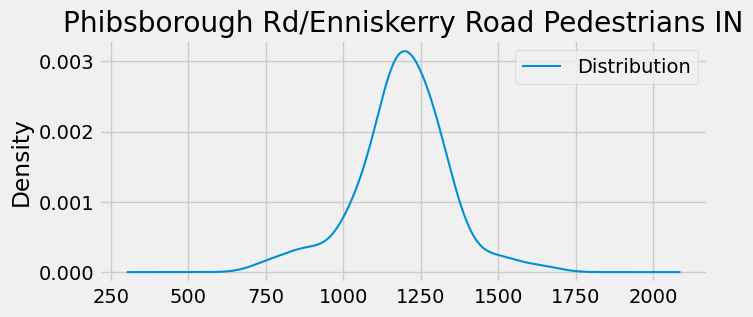

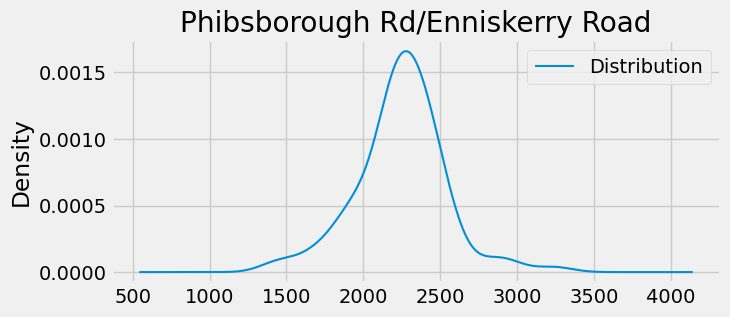

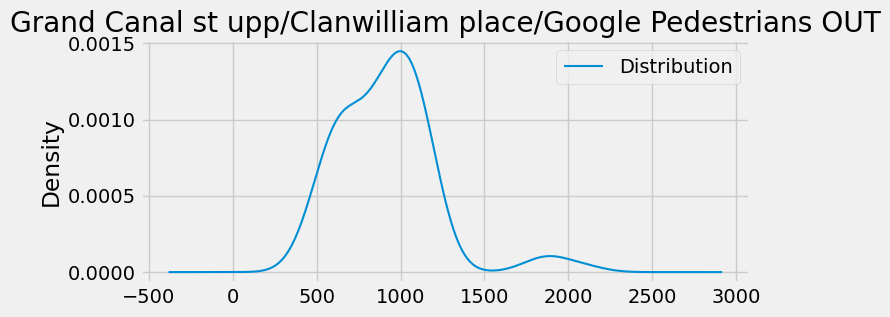

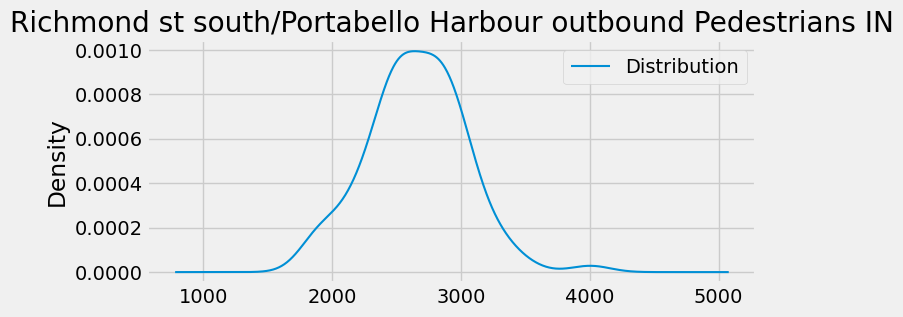

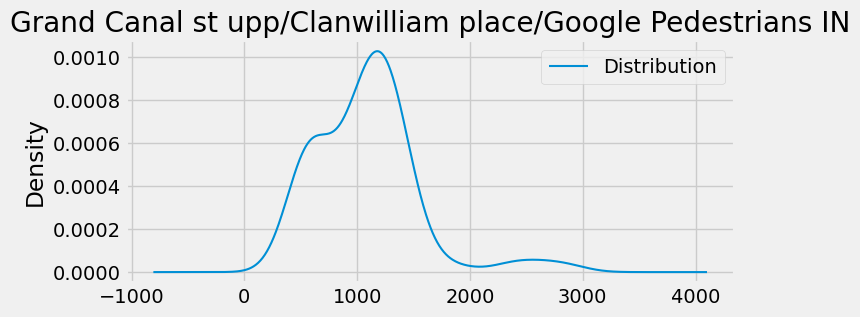

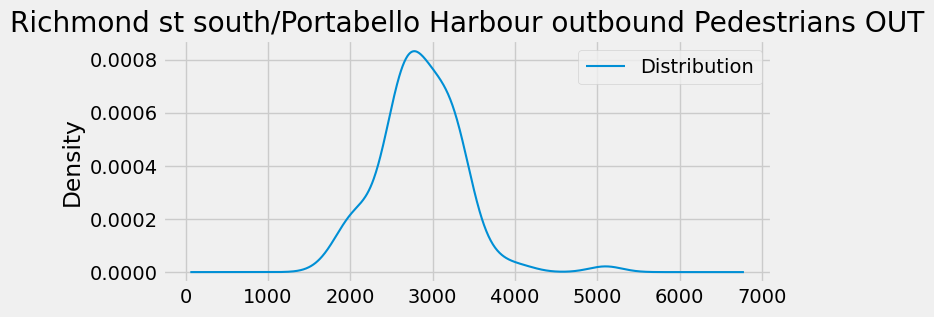

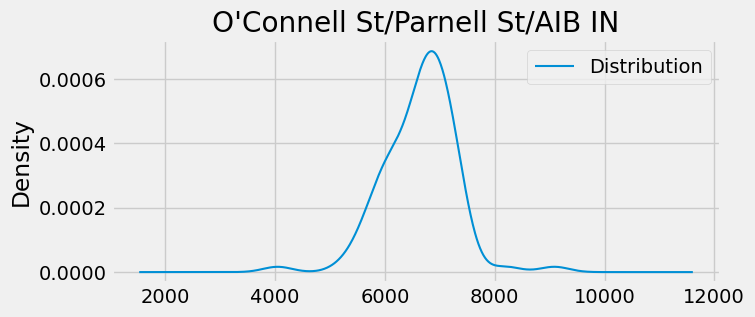

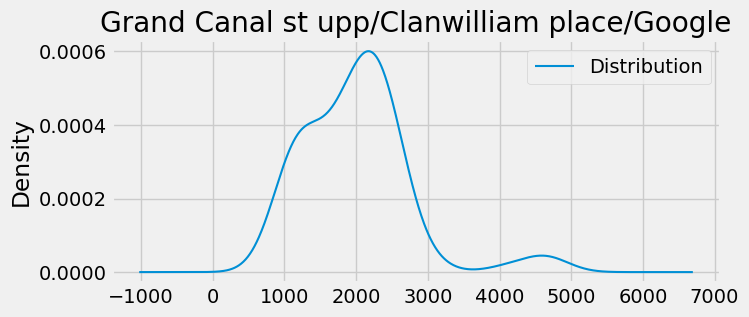

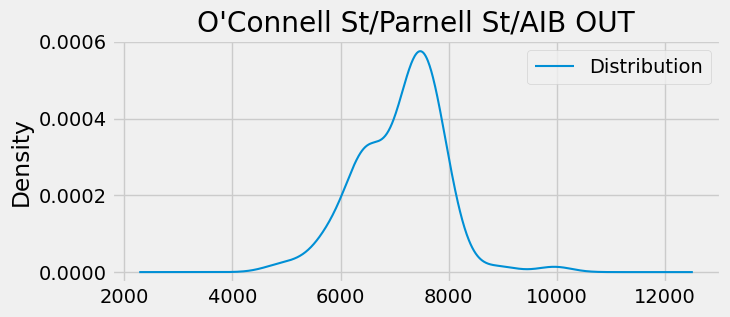

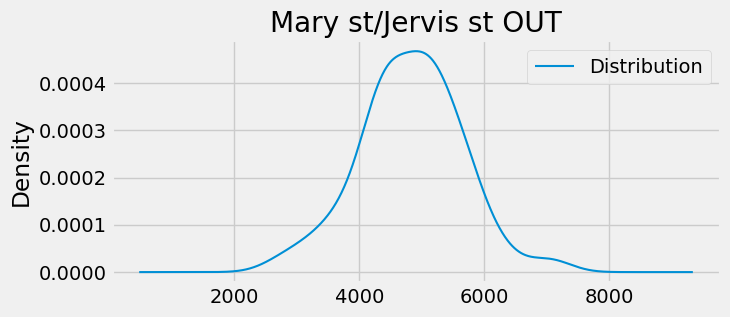

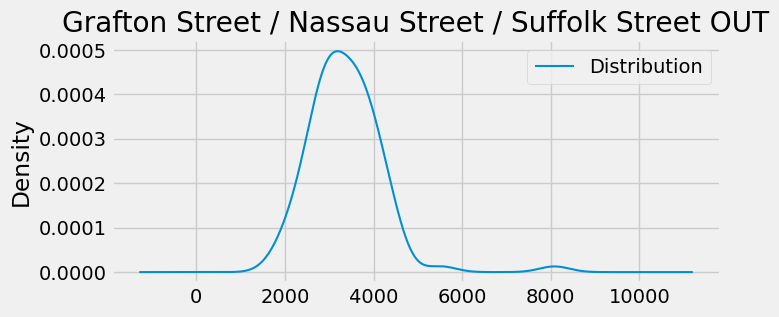

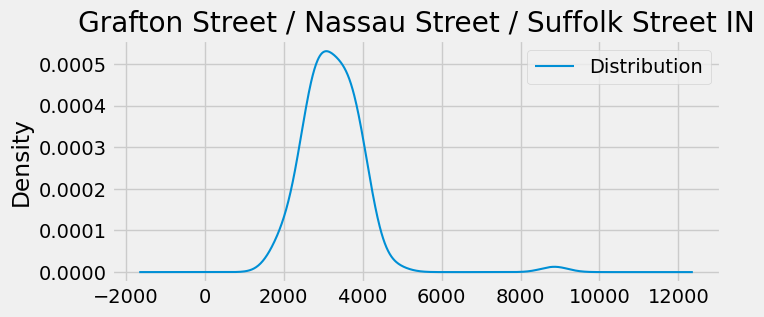

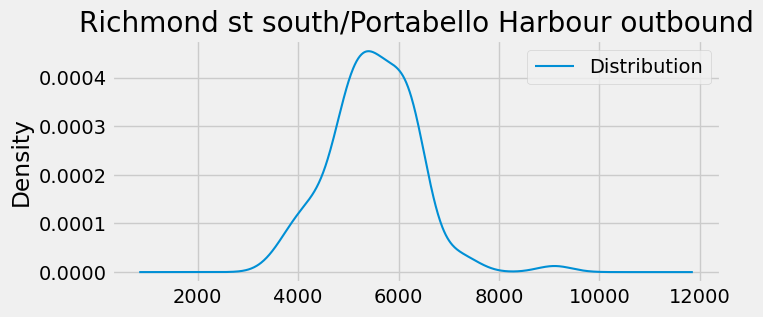

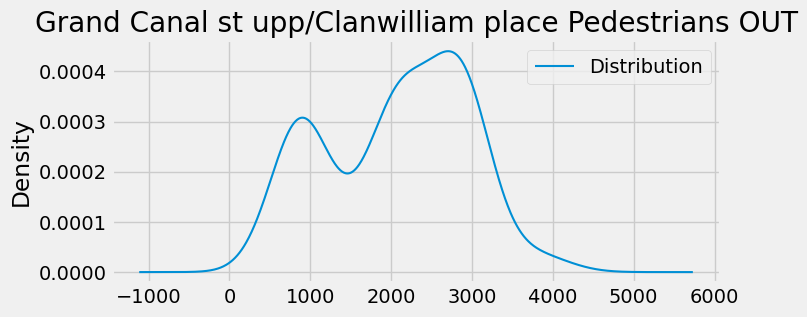

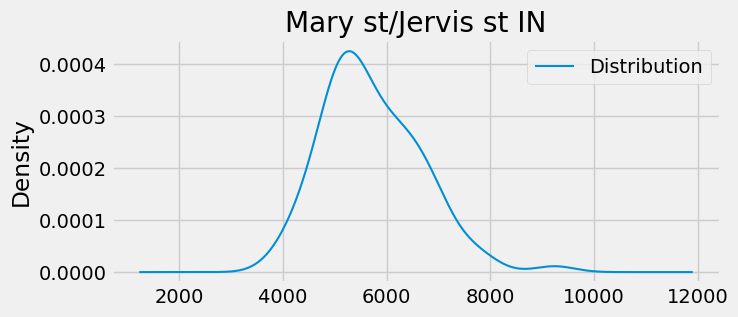

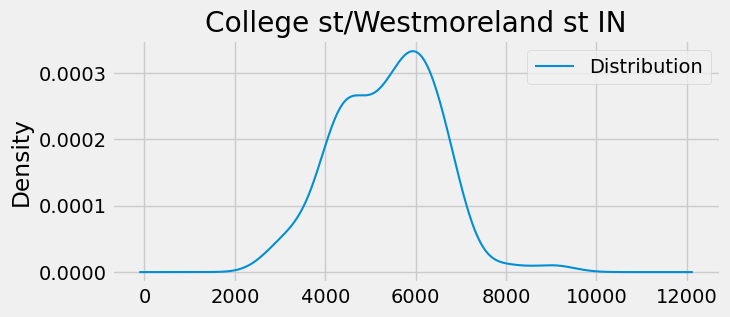

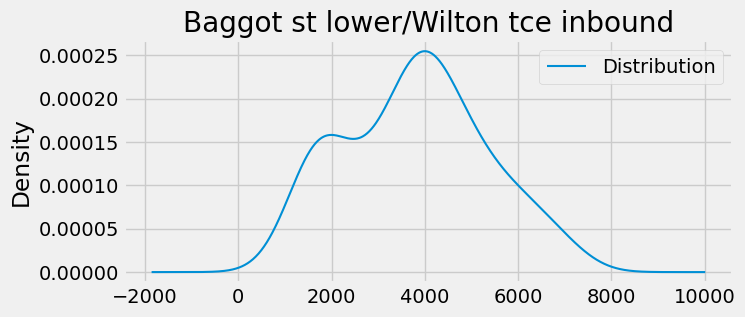

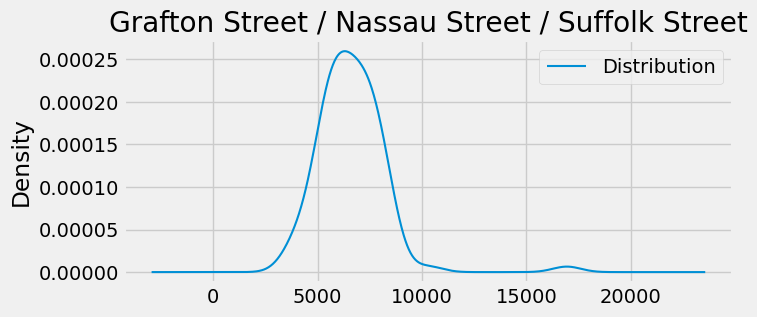

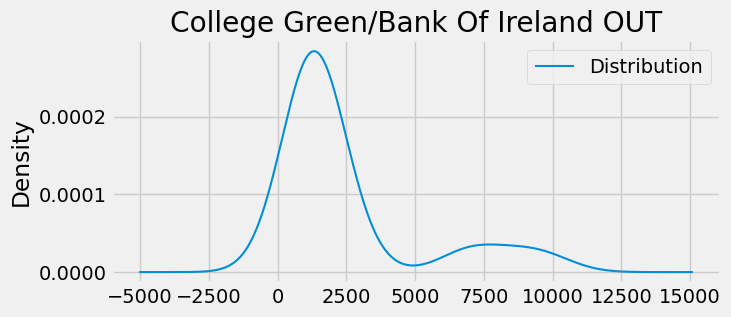

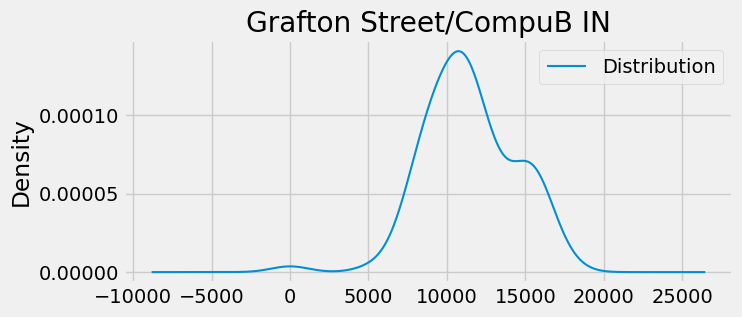

In [39]:
for column in data_train_set1.columns:
    automate_kde_graphs(column,data_train_set1)


In [40]:
def rmse(pred,expected):
    mean_squared_error(expected,pred)
    rmse = math.sqrt(mean_squared_error)
    return rmse

In [41]:
def forecast_error(pred,expected):
    forecast_errors = [expected[i]-pred[i] for i in range(len(expected))]
    bias = sum(forecast_errors) * 1.0/len(expected)
    return bias

In [42]:
def plot_clubbed_values(array):
    # Generate some example data
    np.random.seed(123)
    # Define the number of subplots and the size of the figure
    nrows = 2
    ncols = 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
    x,y = [],[]
    # Define the bins for the histograms
    bins = np.linspace(-4, 4, 20)
    for key,values in array.items():
        x.append(values)
        y.append(key)
    # Loop over the subplots and plot the histograms
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i, j]
            group = i * ncols + j  # calculate the index of the group
            ax.hist(x[y == chr(65 + group)], bins=bins, alpha=0.5, label='Group {}'.format(group+1))
            ax.legend()
            ax.set_xlabel('X')
            ax.set_ylabel('Frequency')
            ax.set_title('Group {}'.format(group+1))


    plt.tight_layout()
    plt.show()

In [48]:
# Create and train forecaster
# ==============================================================================

# Forecaser for 'Charleville Mall'
forecast_error_arr = {}
predictions_object = {}
def forecast_regression(df):
    for column in df.columns[1:]:
        regressor = RandomForestRegressor(random_state=123)
        forecaster = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 6
                 )

        x_train_interm = df[:-steps]
        x_test_interm = df[-steps:]
        x_train = x_train_interm[column]
        x_test = x_test_interm[column]
        forecaster.fit(y=x_train)
        predictions = forecaster.predict(steps=291)
        predictions_object[column] = predictions
        forecast_error_arr[column] = forecast_error(predictions,x_train)
        automate_graphs_pred(column,x_train,x_test,predictions) 
#         MSE = np.square(np.subtract(y_train,y_pred)).mean() 
#         RMSE = math.sqrt(MSE)
#         mse = mean_squared_error(y_pred,y_train)
#         print(RMSE,' ',mse)

/var/folders/vb/xmbxf6v15d56yl6wpxdqgwpm0000gn/T/ipykernel_5922/3070474210.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7, 3))


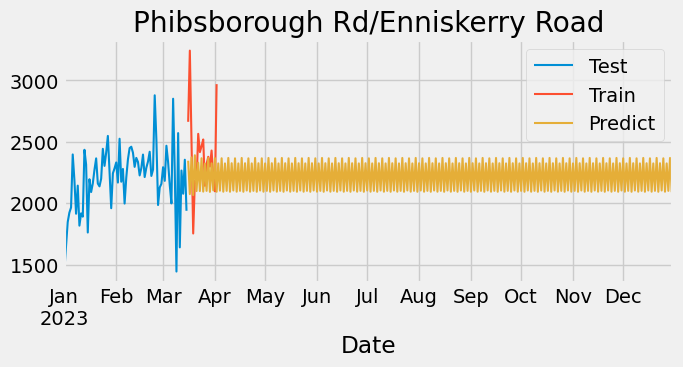

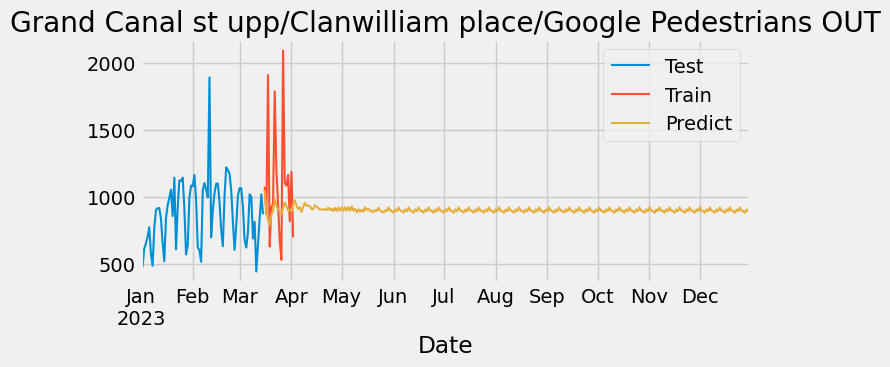

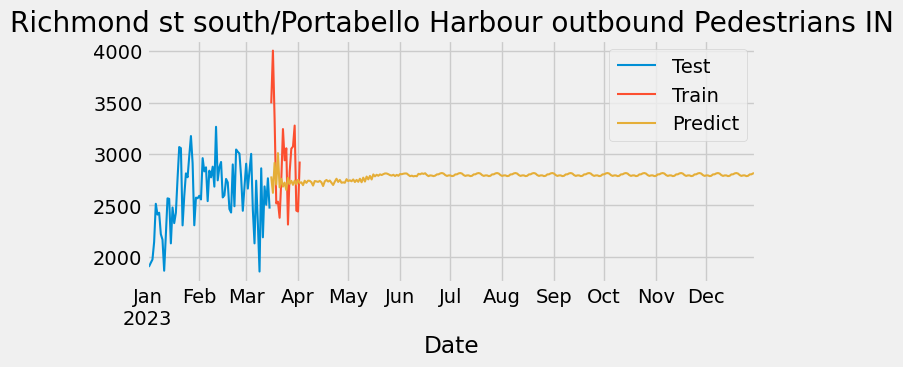

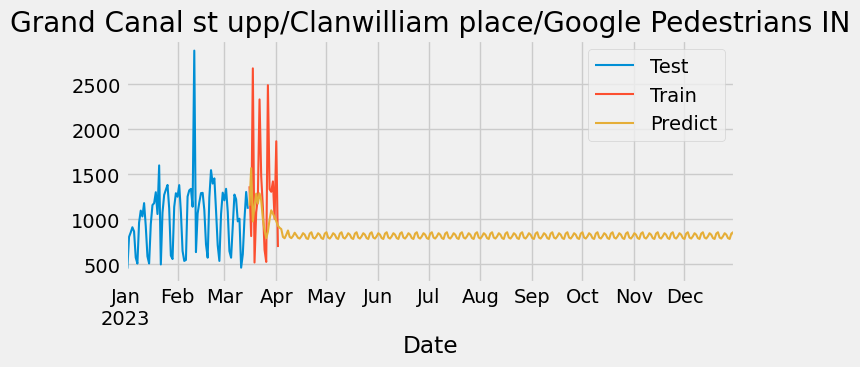

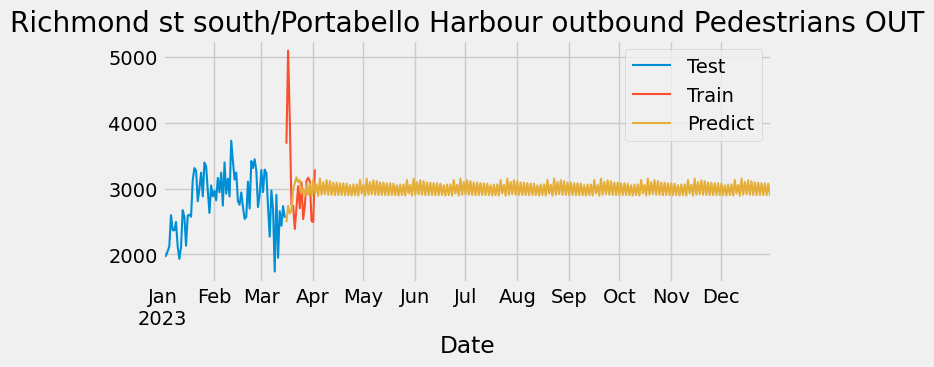

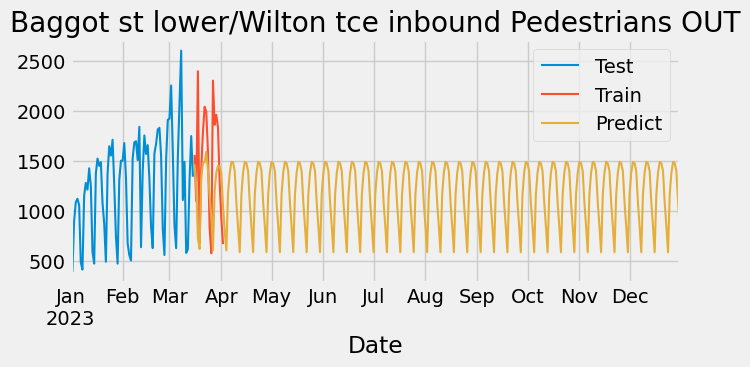

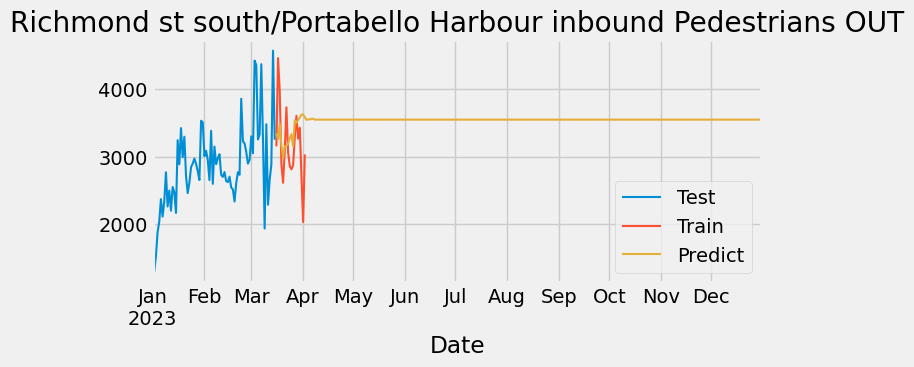

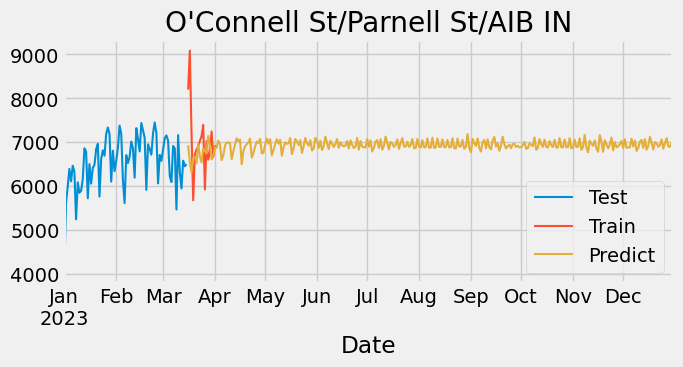

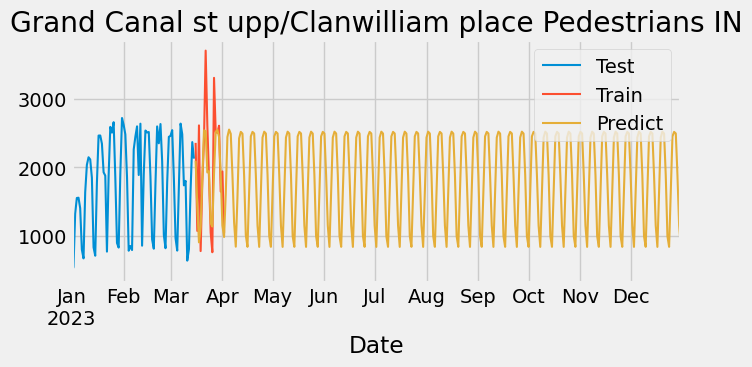

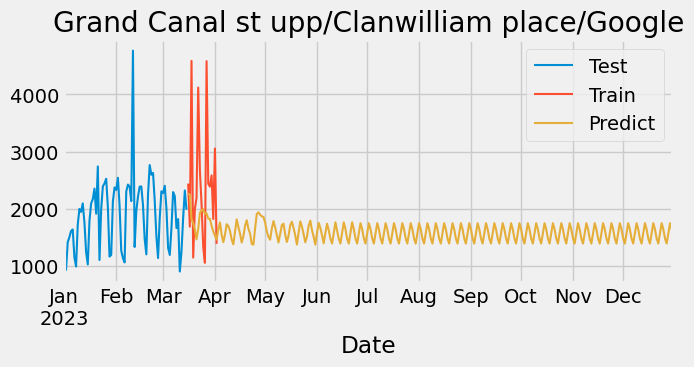

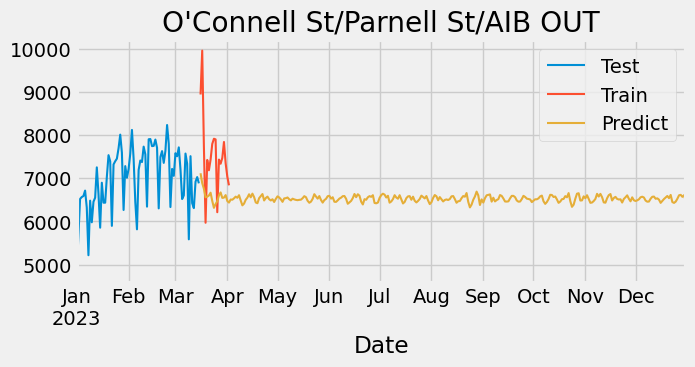

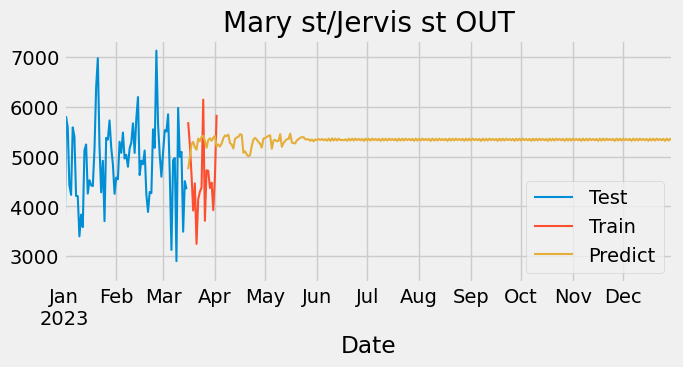

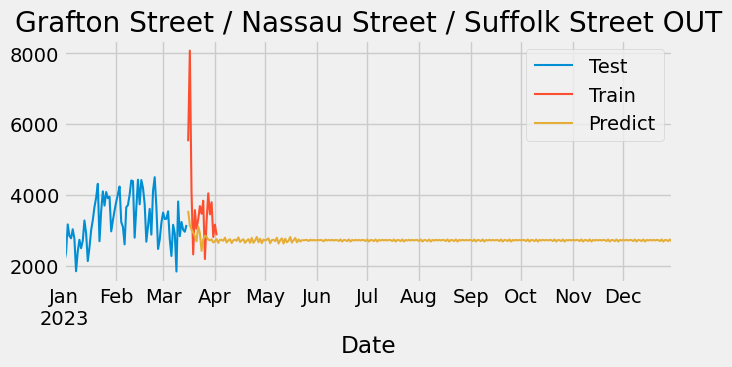

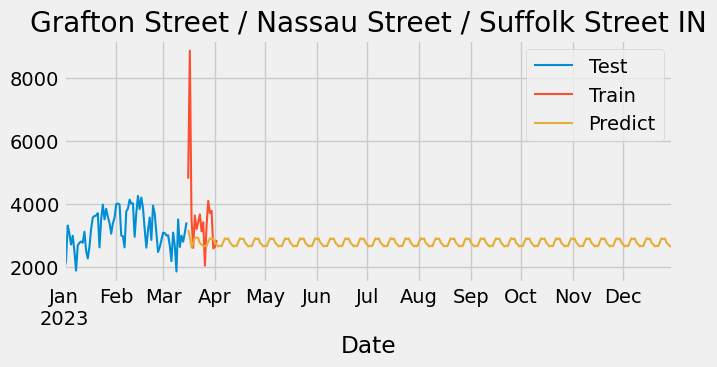

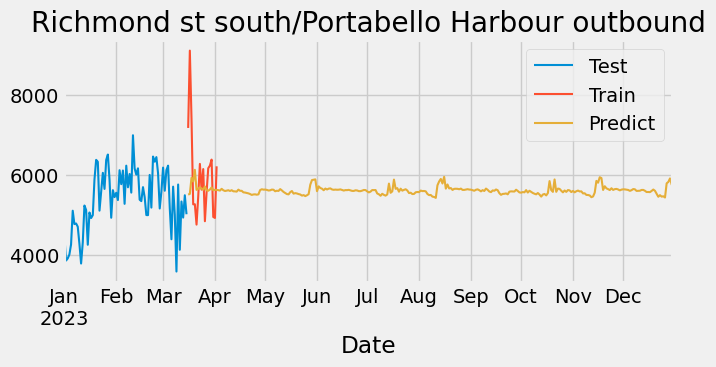

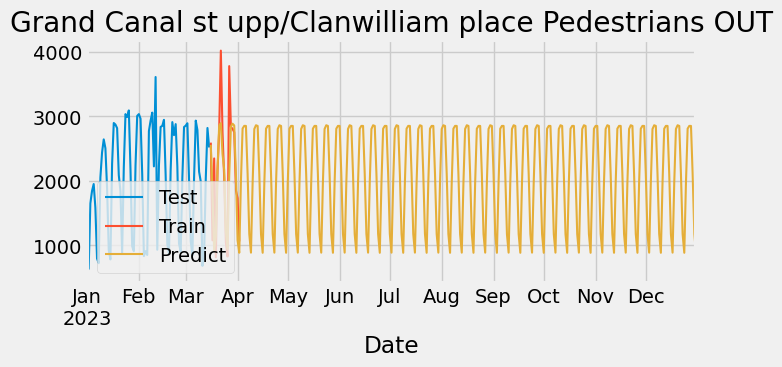

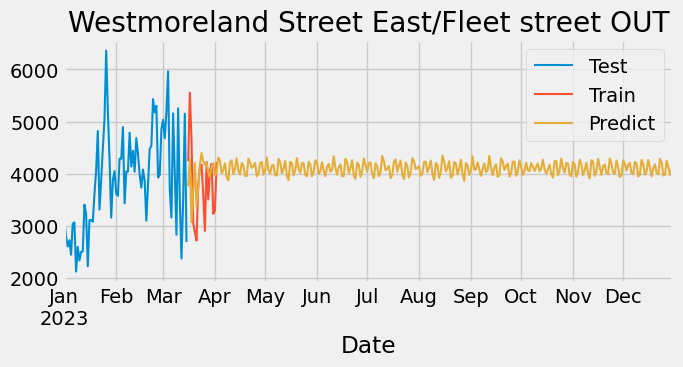

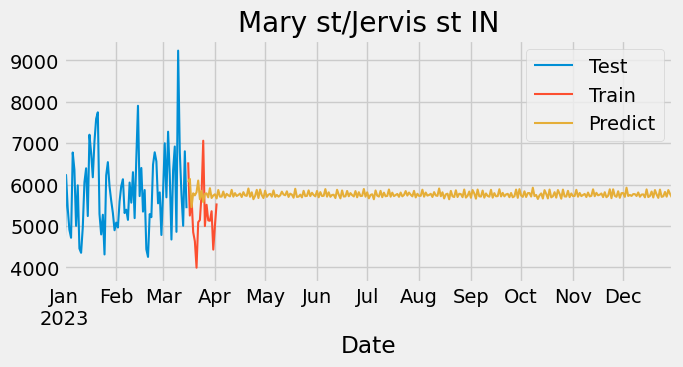

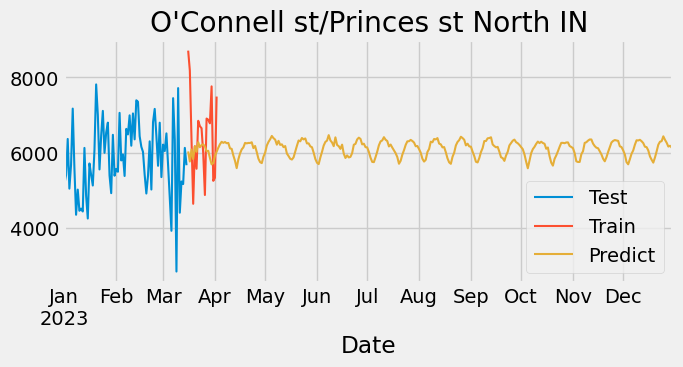

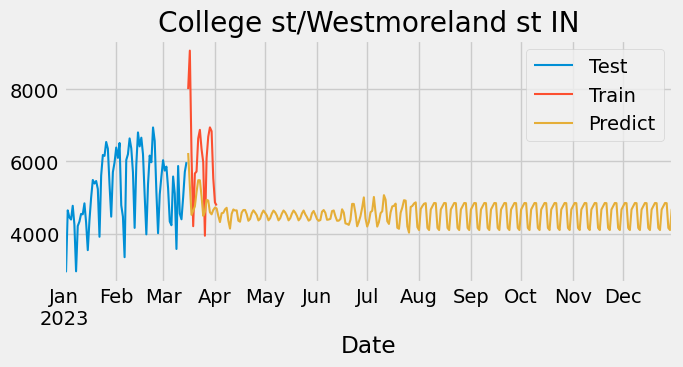

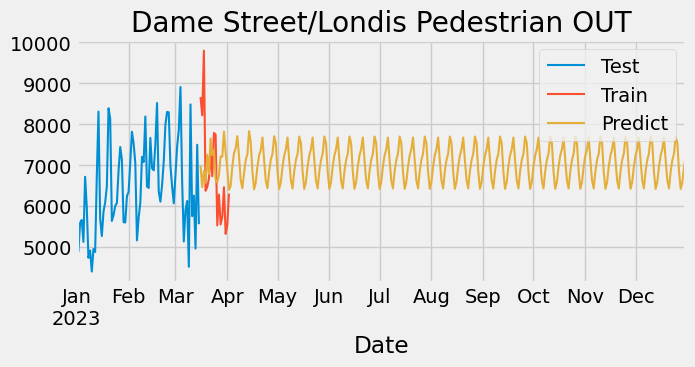

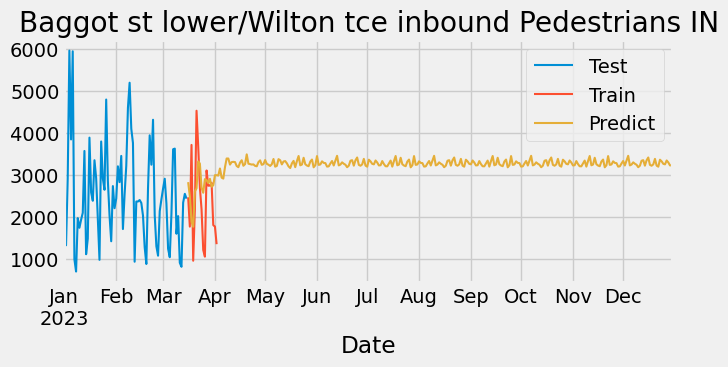

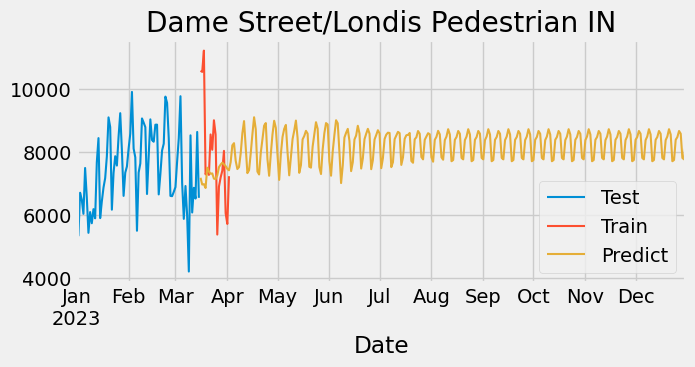

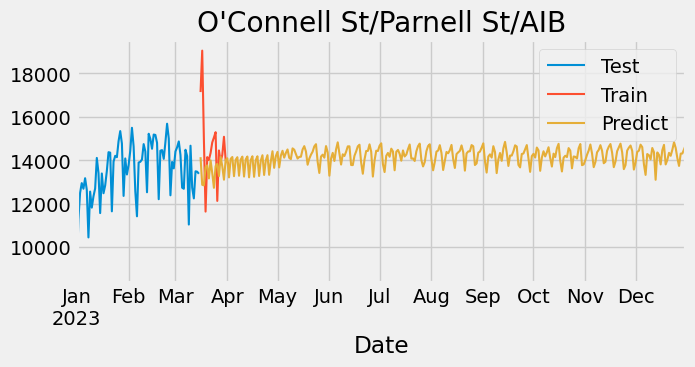

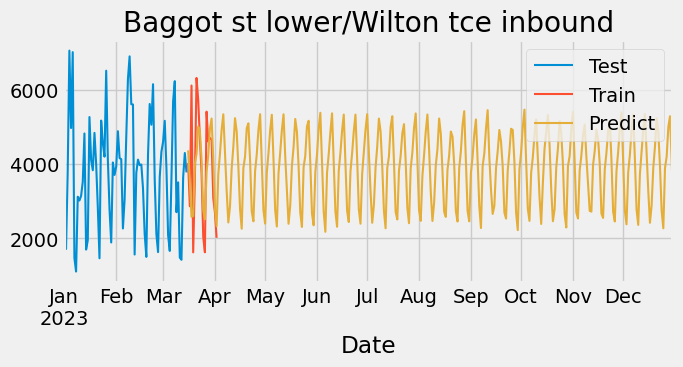

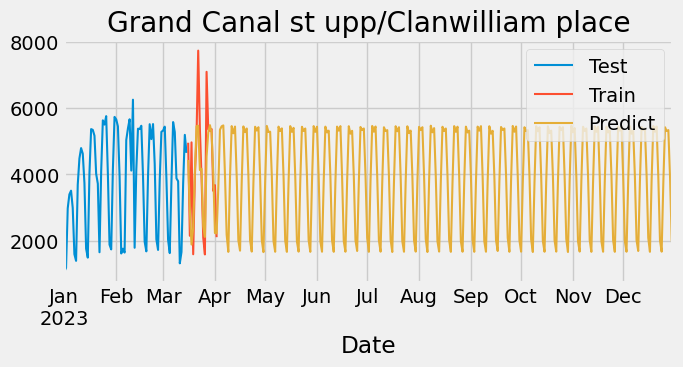

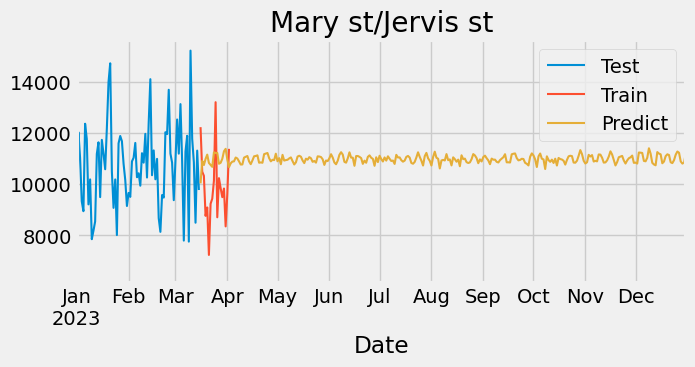

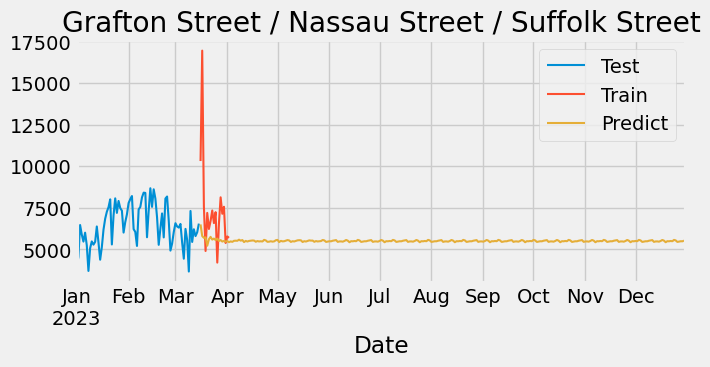

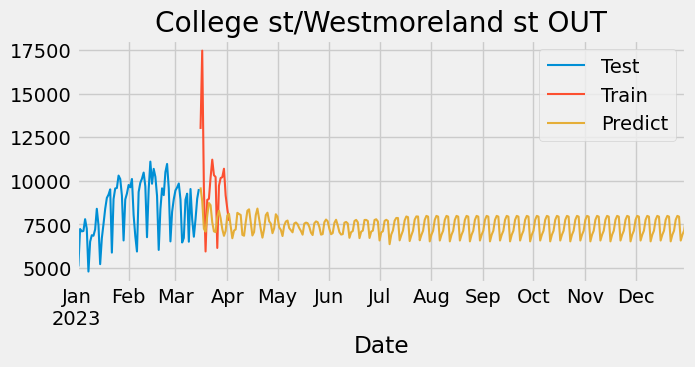

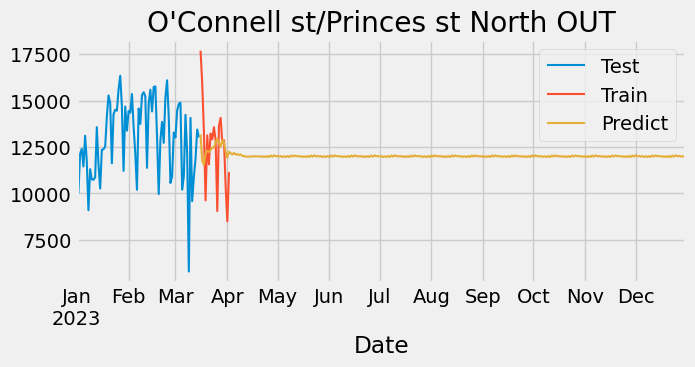

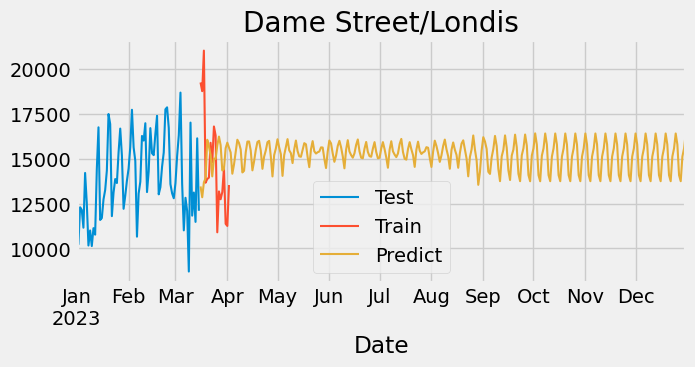

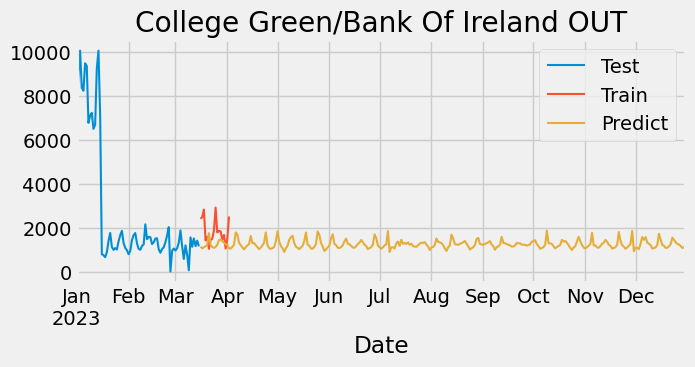

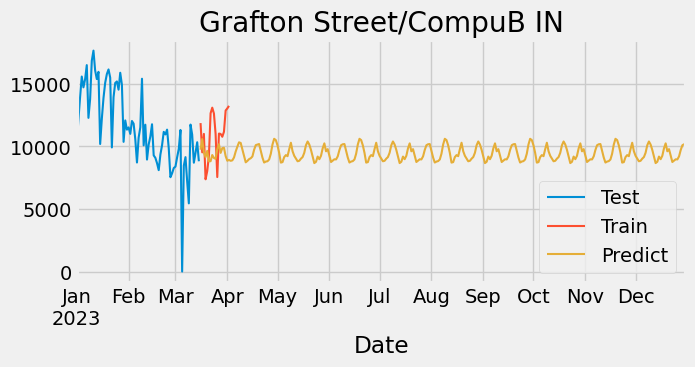

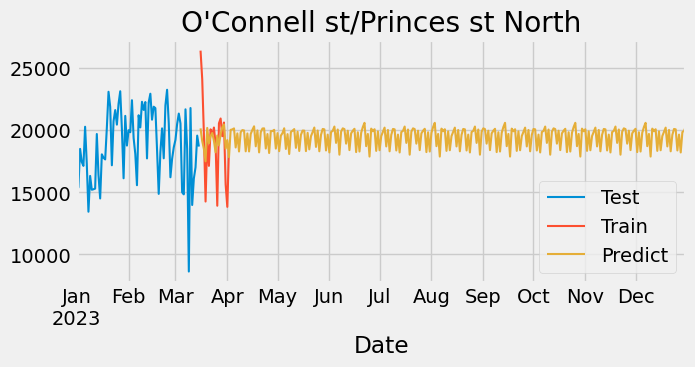

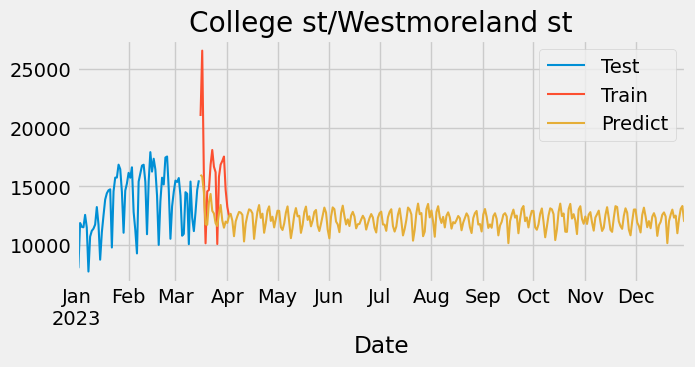

In [49]:
forecast_regression(df_our_data_set1)

In [50]:
predictions_object

{'Phibsborough Rd/Enniskerry Road': 2023-03-16    2345.97
 2023-03-17    2074.17
 2023-03-18    2373.04
 2023-03-19    2065.66
 2023-03-20    2390.52
                ...   
 2023-12-27    2324.08
 2023-12-28    2100.52
 2023-12-29    2368.39
 2023-12-30    2093.06
 2023-12-31    2325.41
 Freq: D, Name: pred, Length: 291, dtype: float64,
 'Grand Canal st upp/Clanwilliam place/Google Pedestrians OUT': 2023-03-16    1051.27
 2023-03-17     889.35
 2023-03-18     828.89
 2023-03-19     786.63
 2023-03-20     867.28
                ...   
 2023-12-27     893.89
 2023-12-28     881.03
 2023-12-29     905.35
 2023-12-30     892.80
 2023-12-31     920.67
 Freq: D, Name: pred, Length: 291, dtype: float64,
 'Richmond st south/Portabello Harbour outbound Pedestrians IN': 2023-03-16    2781.54
 2023-03-17    2621.62
 2023-03-18    2913.37
 2023-03-19    2702.27
 2023-03-20    3008.06
                ...   
 2023-12-27    2800.88
 2023-12-28    2801.69
 2023-12-29    2810.66
 2023-12-30    2814.09
